## Analysis of Financial Customer Segments

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
creditcard_df  = pd.read_csv("Marketing_data.csv")

In [3]:
creditcard_df 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
#transaction have to be non-negative
transaction_columns = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PAYMENTS']
negative_values = creditcard_df[transaction_columns] < 0

# Display columns with negative values, if any
negative_values_summary = negative_values.any()
negative_values_summary

BALANCE                   False
PURCHASES                 False
ONEOFF_PURCHASES          False
INSTALLMENTS_PURCHASES    False
CASH_ADVANCE              False
PAYMENTS                  False
dtype: bool

In [6]:
creditcard_df.describe()
#Mean balance is $1564
#Purchases average is $1003, one off purchase average is ~$600
#Average purchases frequency is around 0.5
# Average tenure is 12 years


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
#the maximum of cash advance, and who made it ? 

creditcard_df['CASH_ADVANCE'].max()
creditcard_df[creditcard_df['CASH_ADVANCE']== 47137.21176]

# the customer has made 123 cash advance transactions and never paid credit card in full

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


this customer appears to be highly active with cash advances, both in terms of the amount and the frequency. The high number of cash advances (123) within a tenure of 12 months suggests that the customer relies heavily on this service. However, Frequent and high cash advances could be in potential credit risk.

In [8]:
creditcard_df.isnull().sum()
#see total missing data in each column

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

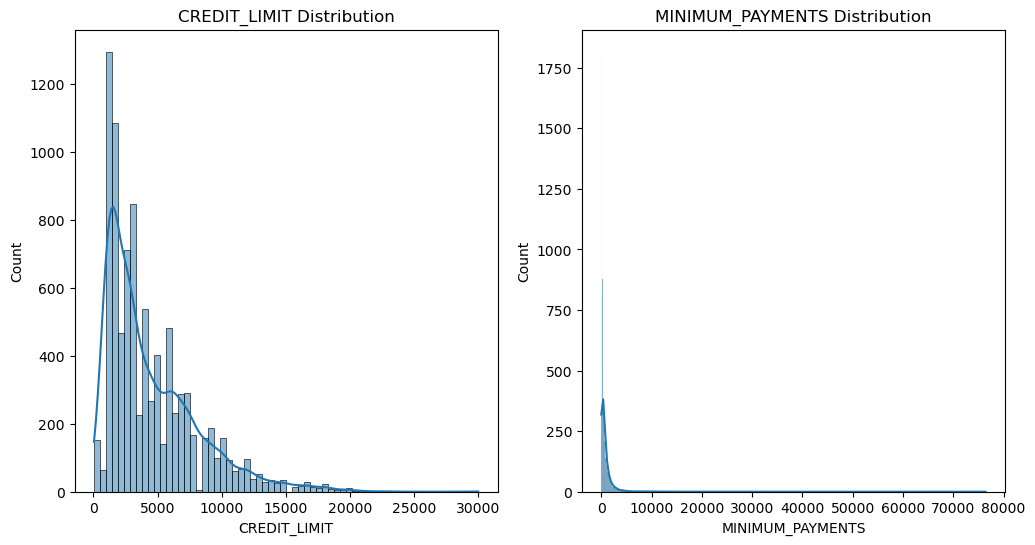

In [9]:
#check the data distribution : 

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(creditcard_df['CREDIT_LIMIT'].dropna(), kde=True)
plt.title('CREDIT_LIMIT Distribution')

plt.subplot(1, 2, 2)
sns.histplot(creditcard_df['MINIMUM_PAYMENTS'].dropna(), kde=True)
plt.title('MINIMUM_PAYMENTS Distribution')

plt.show()

In [10]:
# Fill up the missing elements with median of the 'MINIMUM_PAYMENT'

# Calculate the median values
credit_limit_median = creditcard_df['CREDIT_LIMIT'].median()
minimum_payments_median = creditcard_df['MINIMUM_PAYMENTS'].median()

# Fill missing values with the median
creditcard_df['CREDIT_LIMIT'].fillna(credit_limit_median, inplace=True)
creditcard_df['MINIMUM_PAYMENTS'].fillna(minimum_payments_median, inplace=True)

In [11]:
# check again there is no missing values
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
#drop Customer ID since it has no meaning here
creditcard_df.drop('CUST_ID',axis = 1, inplace = True)

In [13]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
correlations = creditcard_df.corr()


<Axes: >

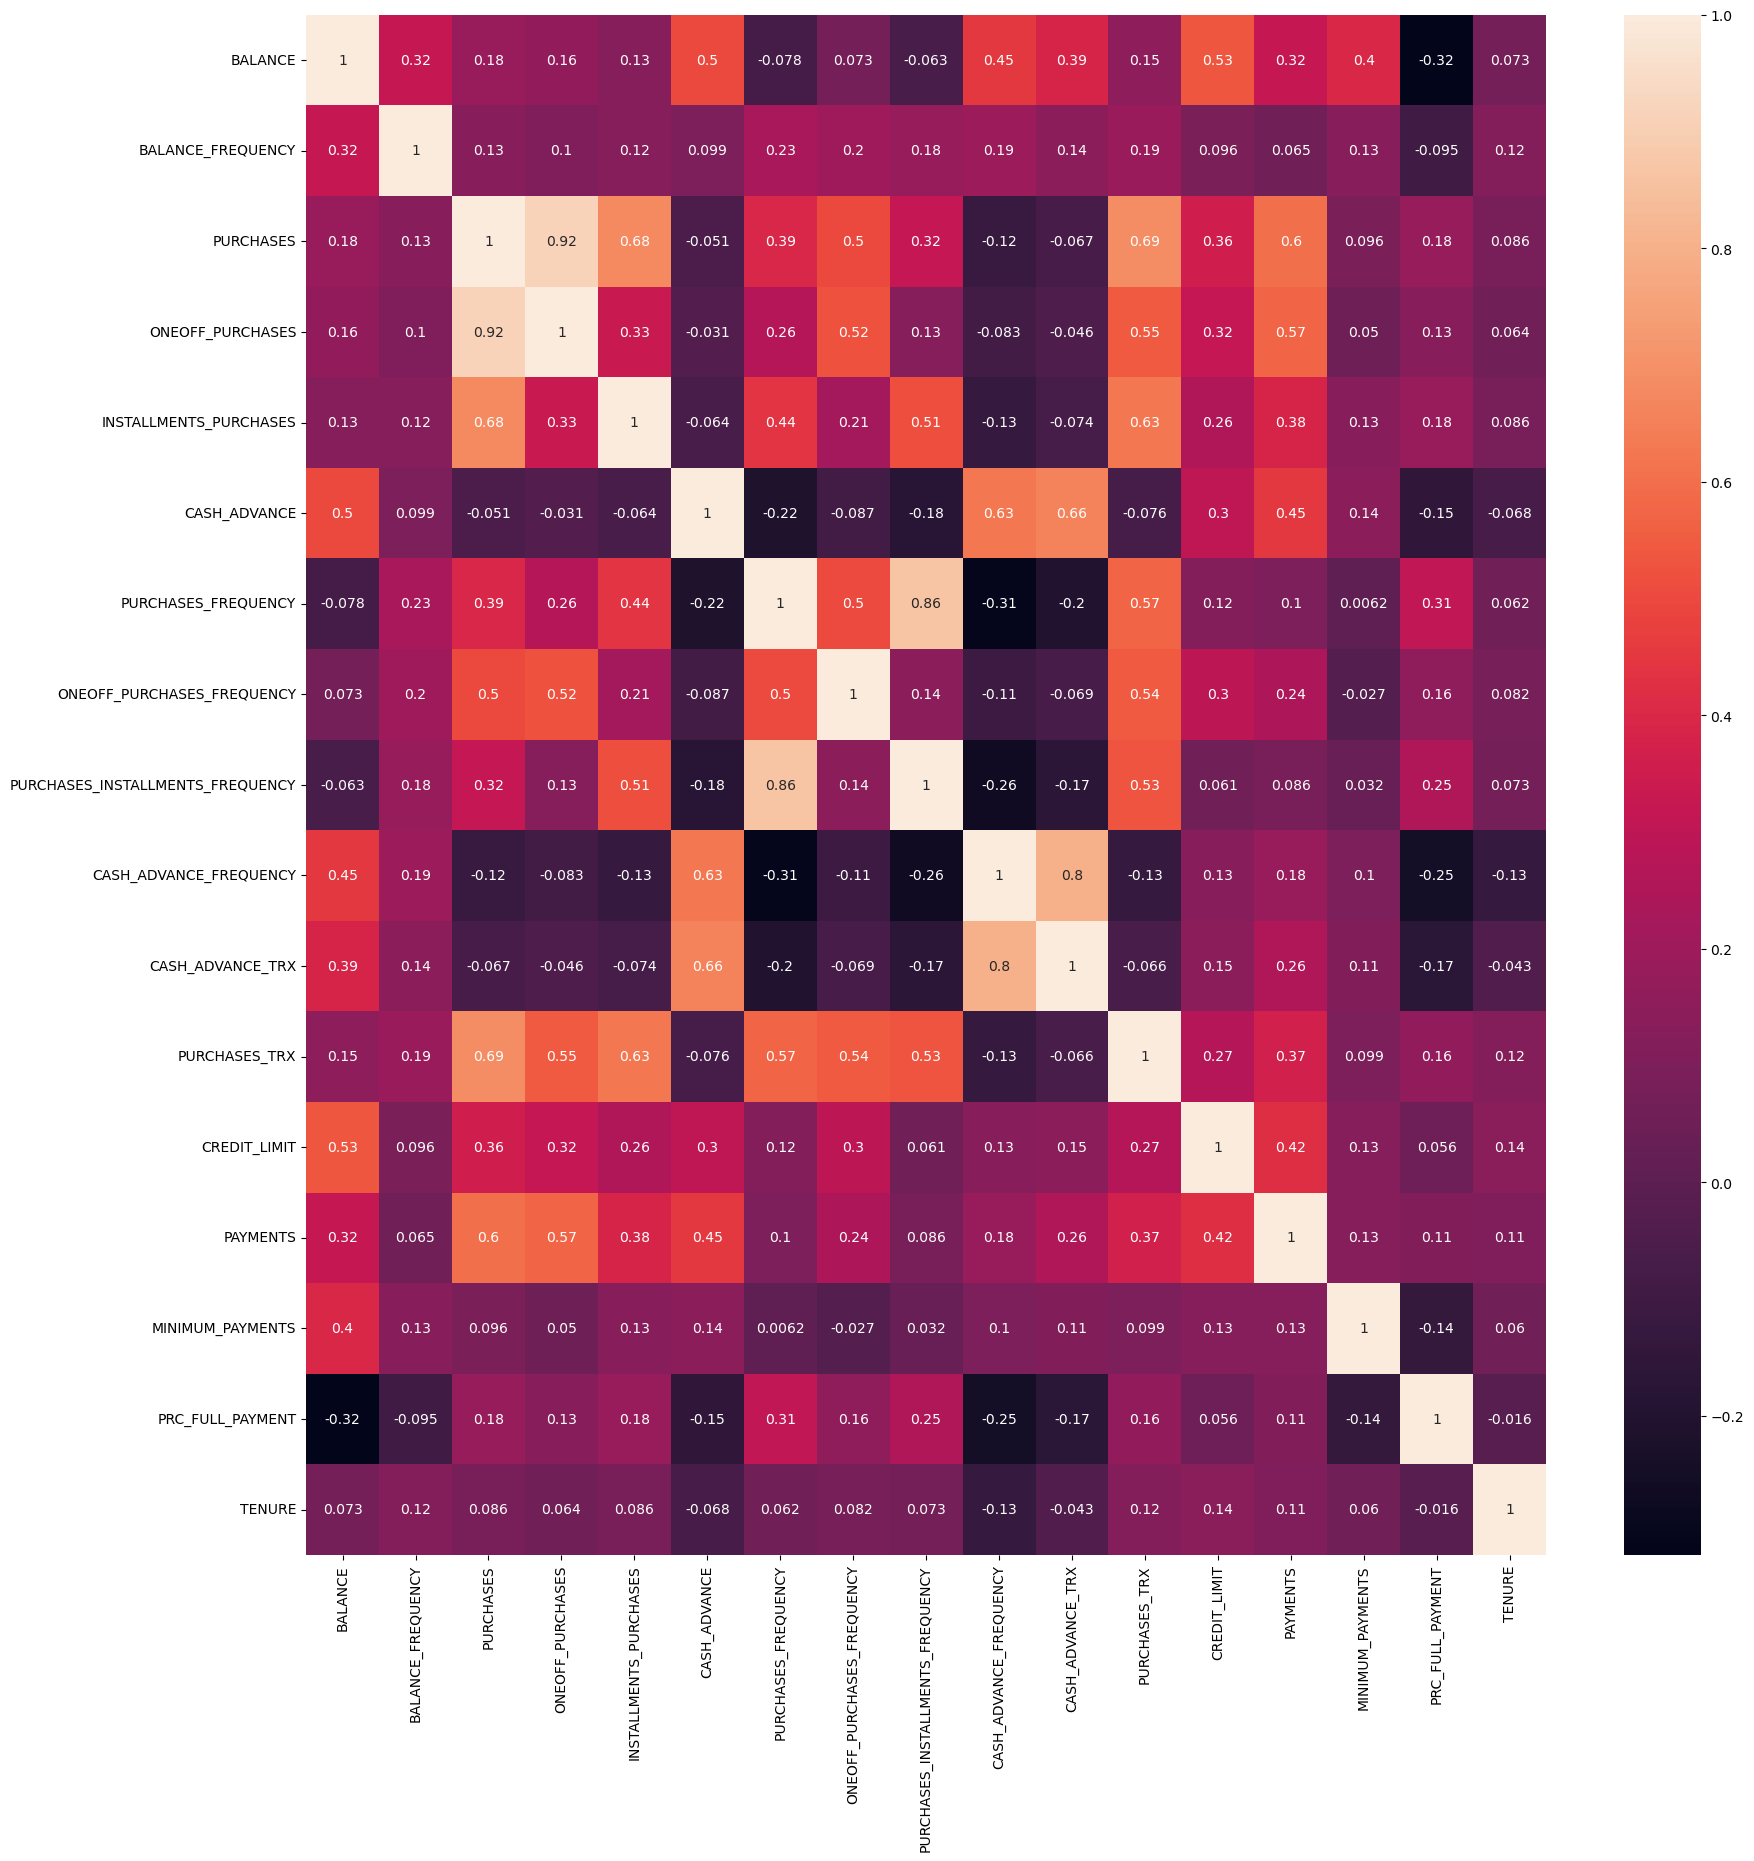

In [155]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlations, annot = True)

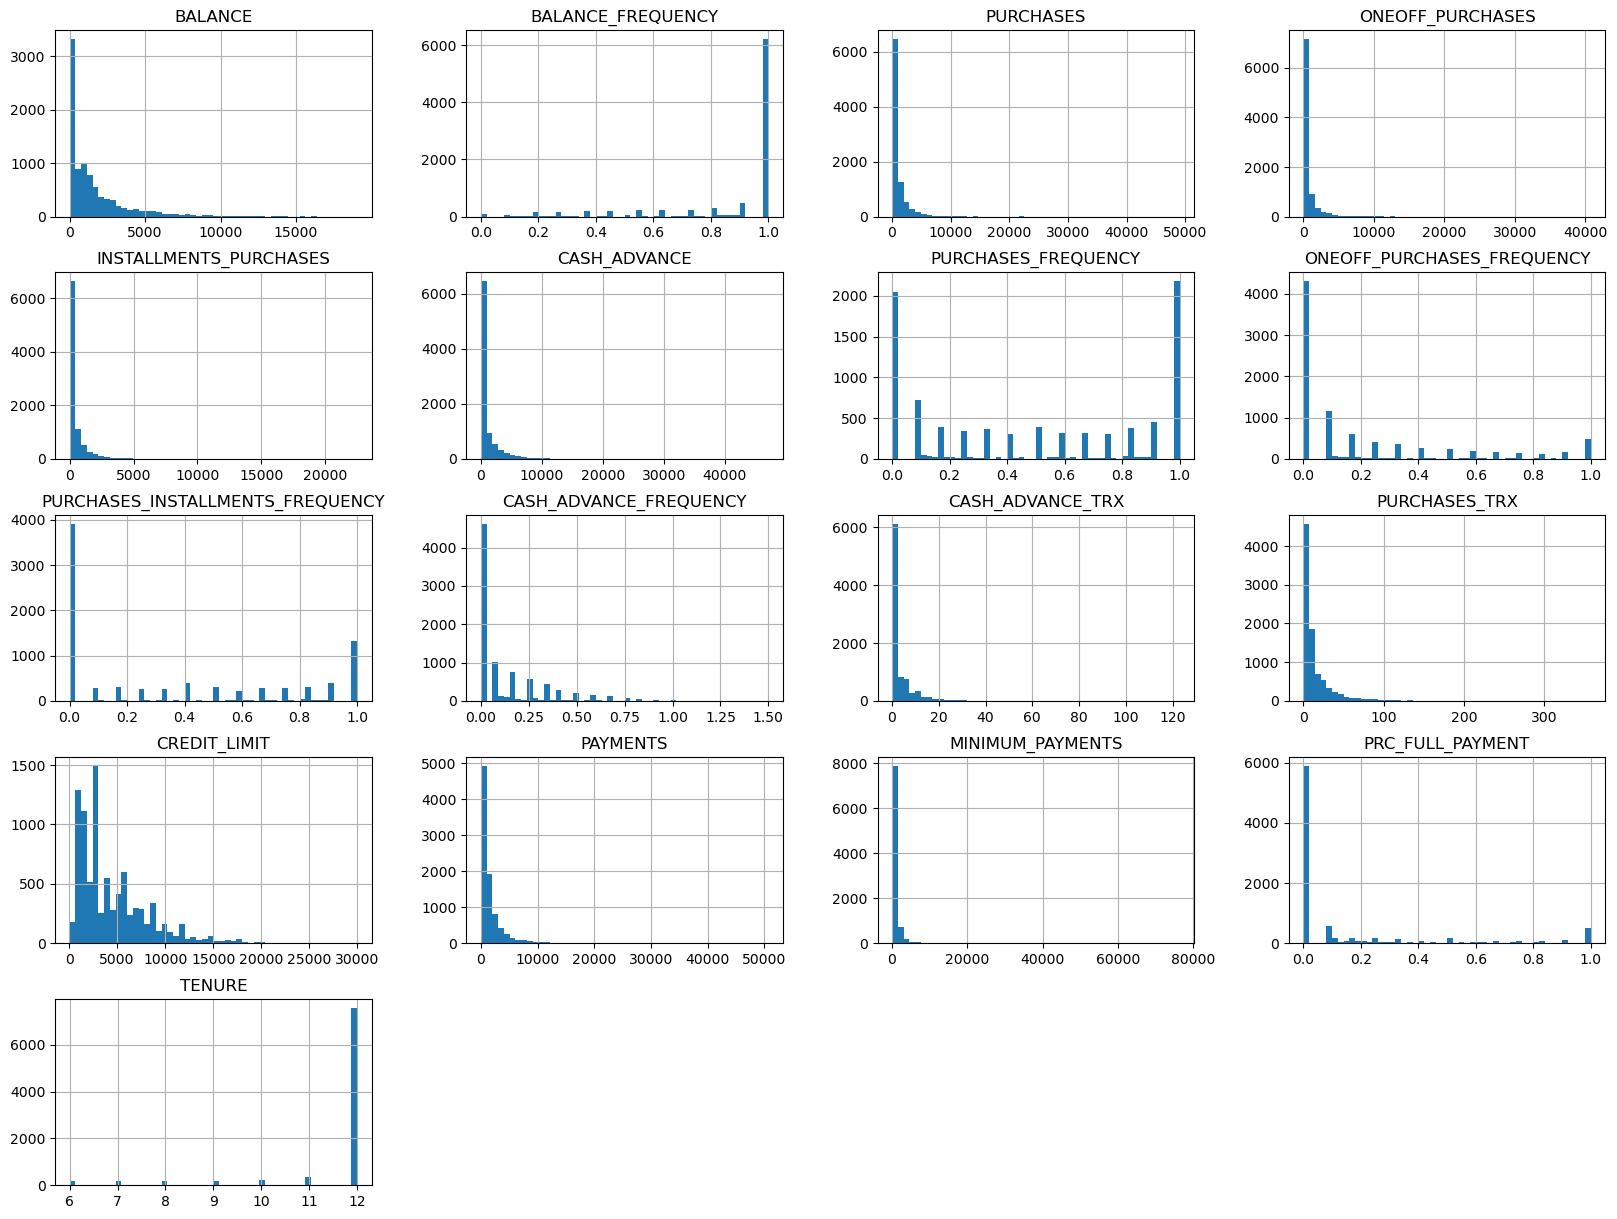

In [15]:
creditcard_df.hist(bins=50, figsize=(20, 15))
plt.show()

Most of the features are highly skewed, the appropriate scaler to use is MinMaxScaler

In [17]:
#Normalise the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit and transform the data
creditcard_df_scaled = scaler.fit_transform(creditcard_df)
creditcard_df_scaled

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

In [18]:
creditcard_df_scaled.shape #8950 rows and 17 columns

(8950, 17)

In [19]:
inertia = [] # store the within-cluster sum of squares
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(creditcard_df_scaled)
    inertia.append(kmeans.inertia_)

#  n_init=10: The warning informs start from scikit-learn version 1.4 ,define this just suppress this warning and ensure consistent behavior

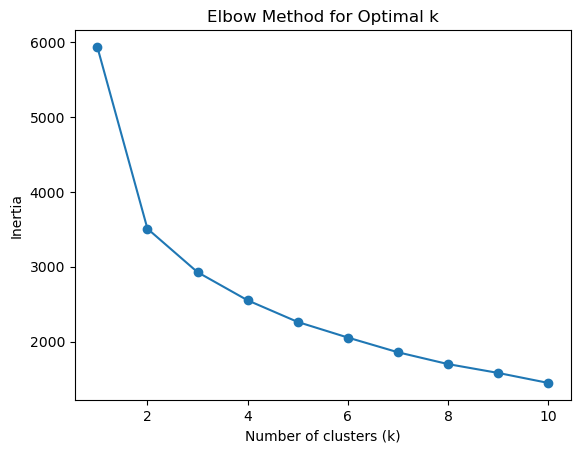

In [20]:
# Plot the elbow curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [32]:

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(creditcard_df_scaled, predicted_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3723938740940775


In [23]:
#choose k= 3 from the elbow method
kmeans = KMeans(3, n_init=10)

# Fit the model and predict the cluster labels
predicted_labels = kmeans.fit_predict(creditcard_df_scaled)

#scaled dataframe add the cluster labels
creditcard_df_cluster = pd.DataFrame(creditcard_df_scaled, columns=creditcard_df.columns)
creditcard_df_cluster['cluster'] = predicted_labels
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0,0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0,0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0,2
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0,0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0,0


In [26]:
#see the shape of the centroids array

print(kmeans.cluster_centers_.shape)  #3 clusters and 17 features

(3, 17)


In [27]:
# Print the centroids
print("Cluster centroids:")
print(kmeans.cluster_centers_)

Cluster centroids:
[[0.0895303  0.82625268 0.00603002 0.0057142  0.00279916 0.02878832
  0.14318915 0.08152457 0.06055969 0.12387186 0.03595031 0.00747343
  0.13660651 0.02911095 0.01079803 0.06833512 0.90781118]
 [0.05981975 0.91386903 0.02174702 0.00659792 0.03547419 0.01066911
  0.87085953 0.0986918  0.81983508 0.04714129 0.01406916 0.05815436
  0.1302215  0.02744458 0.01200294 0.23788325 0.91921188]
 [0.1010818  0.97370607 0.06519944 0.05871543 0.03573504 0.01397872
  0.89300748 0.79848575 0.48096273 0.06236697 0.01899836 0.11822437
  0.22200658 0.06370167 0.01008566 0.2708953  0.95865096]]


In [30]:
# convert the centroids into dataframe
# Exclude the last 'cluster' column otherwise it count the last column 'clusters'and wil
#show the error of 'Shape of passed values is (3, 17), indices imply (3, 18)'

centroid_columns = creditcard_df.columns[:-1]  
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=centroid_columns)

# Display the centroids
print(centroids_df)

    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.089530           0.826253   0.006030          0.005714   
1  0.059820           0.913869   0.021747          0.006598   
2  0.101082           0.973706   0.065199          0.058715   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.002799      0.028788             0.143189   
1                0.035474      0.010669             0.870860   
2                0.035735      0.013979             0.893007   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.081525                          0.060560   
1                    0.098692                          0.819835   
2                    0.798486                          0.480963   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.123872          0.035950       0.007473      0.136607   
1                0.047141          0.014069       0.058154      0.130

In [31]:
# Original creditcard_df add the cluster labels
creditcard_df['cluster'] = predicted_labels
creditcard_df.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [33]:
creditcard_df['cluster'].shape

(8950,)

In [35]:
creditcard_df['cluster'].max() #2
creditcard_df['cluster'].min() #0

0

In [36]:
# PCA cluster

pca = PCA(n_components = 2)
pca_comp = pca.fit_transform(creditcard_df_scaled)
pca_comp

array([[-0.48216769, -0.09765264],
       [-0.60857495, -0.01937583],
       [ 0.30450847,  0.92093391],
       ...,
       [ 0.36038344, -0.42268649],
       [-0.64610006, -0.20439151],
       [-0.0946022 ,  0.39951371]])

In [37]:
pca_df = pd.DataFrame(data = pca_comp, columns = ['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.482168,-0.097653
1,-0.608575,-0.019376
2,0.304508,0.920934
3,-0.588622,-0.005631
4,-0.554357,0.052978


In [38]:
# Add the cluster labels to the PCA DataFrame to show how cluster separated in 2D space
pca_df['cluster'] = predicted_labels
pca_df.head()

,pca1,pca2,cluster
0,-0.482168,-0.097653,0
1,-0.608575,-0.019376,0
2,0.304508,0.920934,2
3,-0.588622,-0.005631,0
4,-0.554357,0.052978,0


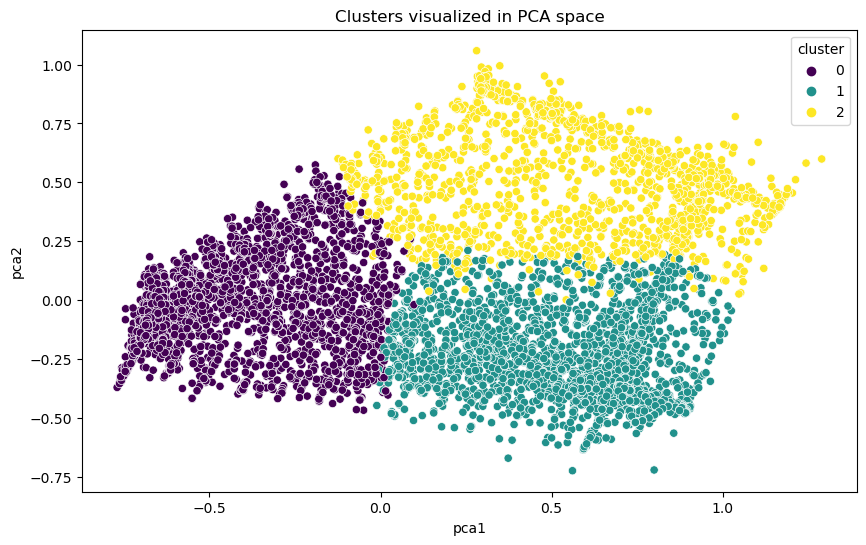

In [39]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='pca1', y='pca2', hue='cluster', palette='viridis')
plt.title('Clusters visualized in PCA space')
plt.show()

The result shows three clusters (0, 1, and 2) appear to be relatively well-separated in the 2D PCA space. This indicates that the algorithm has effectively identified distinct groups within the data.
